In [4]:
import numpy as np
import os

In [2]:
def transform_features(xs, ys, zs):
        RANGES = {
            'MIN_X': -270.0,
            'MAX_X': 270.0,
            'MIN_Y': -270.0,
            'MAX_Y': 270.0,
            'MIN_Z': -185.0,
            'MAX_Z': 1155.0,
            'MIN_LOG_A': 0.0,
            'MAX_LOG_A': 8.60
        }
        xs = (xs - RANGES['MIN_X'])/(RANGES['MAX_X'] - RANGES['MIN_X'])
        ys = (ys - RANGES['MIN_Y'])/(RANGES['MAX_Y'] - RANGES['MIN_Y'])
        zs = (zs - RANGES['MIN_Z'])/(RANGES['MAX_Z'] - RANGES['MIN_Z'])
        return xs, ys, zs

In [3]:
def rescale_feats(xs, ys, zs):
    RANGES = {
            'MIN_X': -270.0,
            'MAX_X': 270.0,
            'MIN_Y': -270.0,
            'MAX_Y': 270.0,
            'MIN_Z': -185.0,
            'MAX_Z': 1155.0,
            'MIN_LOG_A': 0.0,
            'MAX_LOG_A': 8.60
        }
    xs = xs * (RANGES['MAX_X'] - RANGES['MIN_X']) + RANGES['MIN_X']
    ys = ys * (RANGES['MAX_Y'] - RANGES['MIN_Y']) + RANGES['MIN_Y']
    zs = zs * (RANGES['MAX_Z'] - RANGES['MIN_Z']) + RANGES['MIN_Z']
    return xs, ys, zs

In [21]:
root = os.getcwd()
files = [root+'/O16_train.npy', root+'/O16_test.npy']

for file in files:
    f = np.load(file)
    maxes = np.ndarray((len(f), 3))
    mins = np.ndarray((len(f), 3))

    for idx, event in enumerate(f):

        maxes[idx, 0] = np.max(event[:, 0], axis=0)
        maxes[idx, 1] = np.max(event[:, 1], axis=0)
        maxes[idx, 2] = np.max(event[:, 2], axis=0)
        mins[idx, 0] = np.min(event[:, 0], axis=0)
        mins[idx, 1] = np.min(event[:, 1], axis=0)
        mins[idx, 2] = np.min(event[:, 2], axis=0)

    if 'train' in file:
        train_maxes = maxes
        train_mins = mins
    elif 'test' in file:
        test_maxes = maxes
        test_mins = mins


In [8]:
from matplotlib import pyplot as plt

In [19]:
def triplet_img(input_pc, output_pc, gt_pc, idx, maxes, mins):

    # assert os.getcwd() == '/home/DAVIDSON/bewagner/summer2023/ATTPCPoinTr', f'Current Directory == {os.getcwd()}'


    fig, (input_ax, output_ax, gt_ax) = plt.subplots(1, 3, figsize=(15,6), subplot_kw=dict(projection='3d'))

    input_xs, input_ys, input_zs = rescale_feats(input_pc[:, 0], input_pc[:, 1], input_pc[:, 2])

    # input_xs = input_pc[:, 0]
    # input_ys = input_pc[:, 1]
    # input_zs = input_pc[:, 2]

    # output_xs = output_pc[:, 0]
    # output_ys = output_pc[:, 1]
    # output_zs = output_pc[:, 2]

    gt_xs = gt_pc[:, 0]
    gt_ys = gt_pc[:, 1]
    gt_zs = gt_pc[:, 2]

    input_ax.scatter(input_xs, input_ys, input_zs, s=15)
    # output_ax.scatter(output_xs, output_ys, output_zs, s=15)
    gt_ax.scatter(gt_xs, gt_ys, gt_zs, s=15)

    input_ax.set_xlim(xmin=mins[idx, 0], xmax=maxes[idx, 0])
    input_ax.set_ylim(ymin=mins[idx, 1], ymax=maxes[idx, 1])
    input_ax.set_zlim(zmin=mins[idx, 2], zmax=maxes[idx, 2])

    output_ax.set_xlim(xmin=mins[idx, 0], xmax=maxes[idx, 0])
    output_ax.set_ylim(ymin=mins[idx, 1], ymax=maxes[idx, 1])
    output_ax.set_zlim(zmin=mins[idx, 2], zmax=maxes[idx, 2])

    gt_ax.set_xlim(xmin=mins[idx, 0], xmax=maxes[idx, 0])
    gt_ax.set_ylim(ymin=mins[idx, 1], ymax=maxes[idx, 1])
    gt_ax.set_zlim(zmin=mins[idx, 2], zmax=maxes[idx, 2])

    input_ax.set_xlabel('X')
    input_ax.set_ylabel('Y')
    input_ax.set_zlabel('Z')

    output_ax.set_xlabel('X')
    output_ax.set_ylabel('Y')
    output_ax.set_zlabel('Z')

    gt_ax.set_xlabel('X')
    gt_ax.set_ylabel('Y')
    gt_ax.set_zlabel('Z')

    input_ax.set_title('Input')
    output_ax.set_title('Output')
    gt_ax.set_title('Ground Truth')

    fig.suptitle('Event '+str(idx).zfill(3))

    # plt.savefig('./data/O16/256p/imgs/event'+str(idx).zfill(3)+'.png')
    # plt.close()
    plt.show()

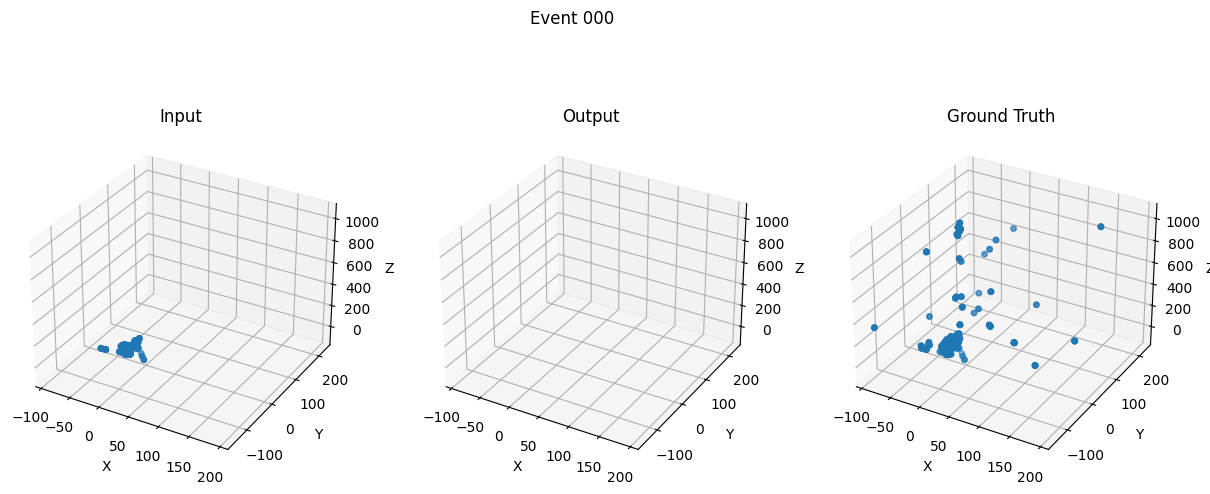

In [22]:
input = np.load('256p/zSliced_O16test.npy')
gt = np.load('O16_test.npy')
triplet_img(input[0], None, gt[0], 0, test_maxes, test_mins)